In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sns
from scipy.sparse import csr_matrix
import sklearn
import copy

In [ ]:
os.chdir('./results_batch')
os.listdir()

In [4]:
from scipy.sparse import load_npz

# Load the .npz file as a sparse matrix
sparse_mat_list = []
for i in range(16):
    sparse_mat = load_npz('Pancreas_jaccard_matrix_' + str(i) + '.npz')
    sparse_mat_list.append(sparse_mat)
    print('Loaded Pancreas_jaccard_matrix_' + str(i) + '.npz')
    print('Shape:', sparse_mat.shape)

Loaded Pancreas_jaccard_matrix_0.npz
Shape: (118, 3696)
Loaded Pancreas_jaccard_matrix_1.npz
Shape: (121, 3696)
Loaded Pancreas_jaccard_matrix_2.npz
Shape: (126, 3696)
Loaded Pancreas_jaccard_matrix_3.npz
Shape: (131, 3696)
Loaded Pancreas_jaccard_matrix_4.npz
Shape: (136, 3696)
Loaded Pancreas_jaccard_matrix_5.npz
Shape: (143, 3696)
Loaded Pancreas_jaccard_matrix_6.npz
Shape: (149, 3696)
Loaded Pancreas_jaccard_matrix_7.npz
Shape: (159, 3696)
Loaded Pancreas_jaccard_matrix_8.npz
Shape: (169, 3696)
Loaded Pancreas_jaccard_matrix_9.npz
Shape: (181, 3696)
Loaded Pancreas_jaccard_matrix_10.npz
Shape: (197, 3696)
Loaded Pancreas_jaccard_matrix_11.npz
Shape: (218, 3696)
Loaded Pancreas_jaccard_matrix_12.npz
Shape: (248, 3696)
Loaded Pancreas_jaccard_matrix_13.npz
Shape: (294, 3696)
Loaded Pancreas_jaccard_matrix_14.npz
Shape: (382, 3696)
Loaded Pancreas_jaccard_matrix_15.npz
Shape: (924, 3696)


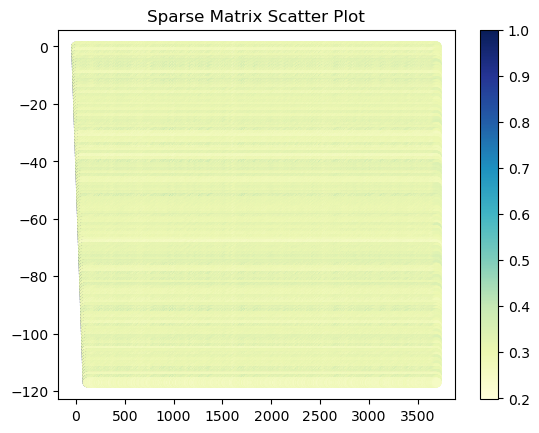

In [14]:
# Get the non-zero indices and values of the sparse matrix
nonzero_indices = sparse_mat_list[0].nonzero()
nonzero_values = sparse_mat_list[0].data

# Create a scatter plot of the sparse matrix
plt.scatter(nonzero_indices[1], -nonzero_indices[0], c=nonzero_values, cmap='YlGnBu')
plt.colorbar()
plt.title('Sparse Matrix Scatter Plot')
plt.show()

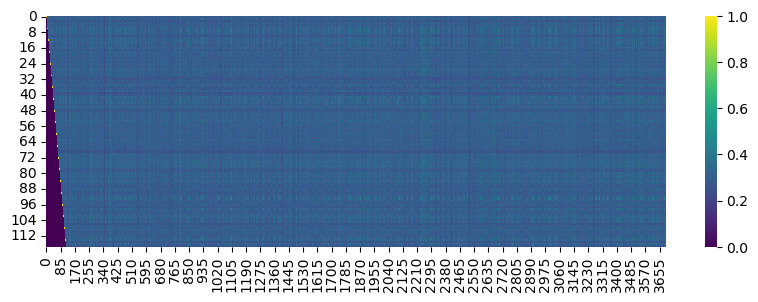

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

# Assuming sparse_matrix is your sparse matrix
dense_matrix = sparse_mat_list[0].todense()

plt.figure(figsize=(10, 3))
sns.heatmap(dense_matrix, cmap='viridis')
plt.show()

(118, 3696)


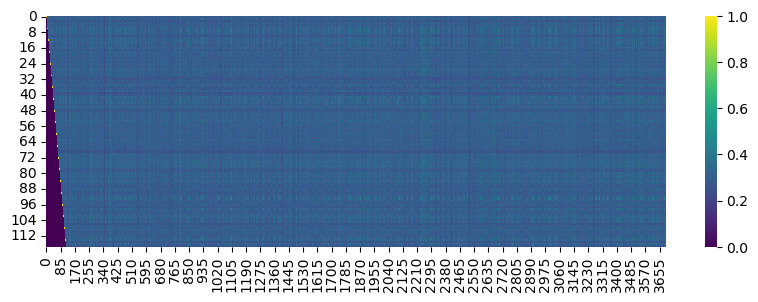

(121, 3696)


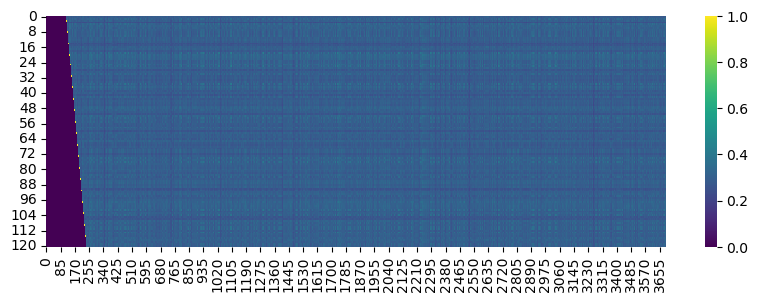

(126, 3696)


(131, 3696)


(136, 3696)


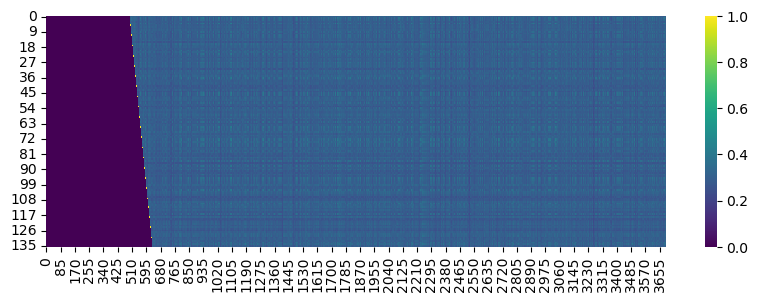

(143, 3696)


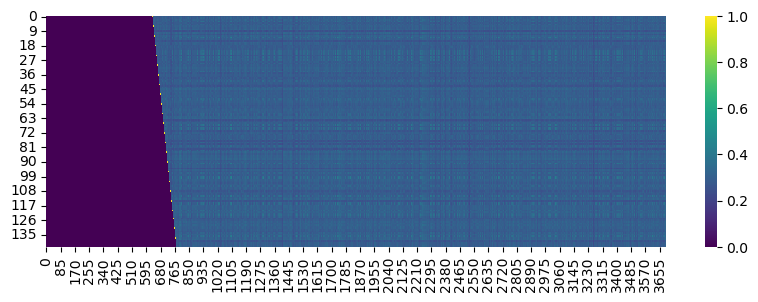

(149, 3696)


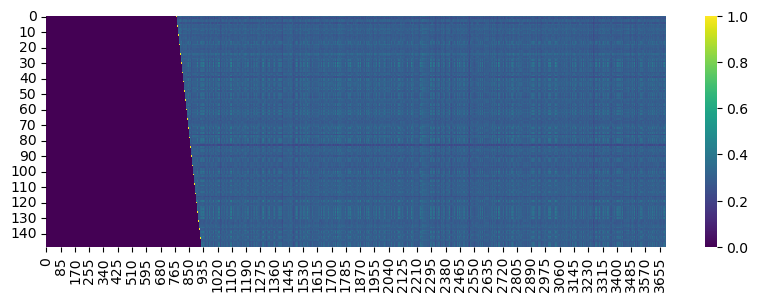

(159, 3696)


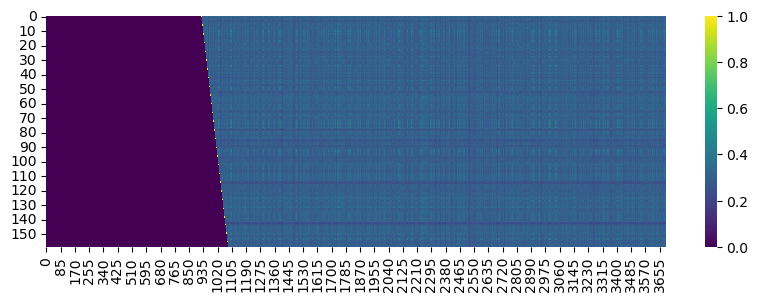

(169, 3696)


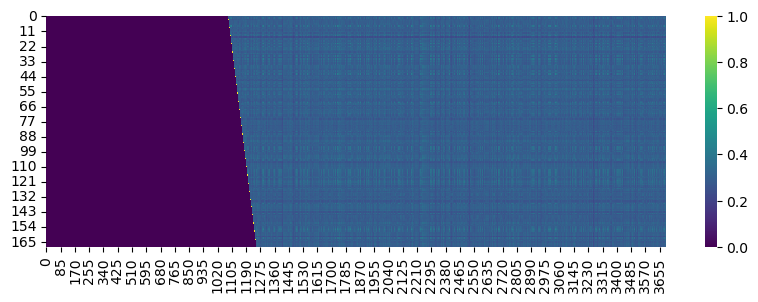

(181, 3696)


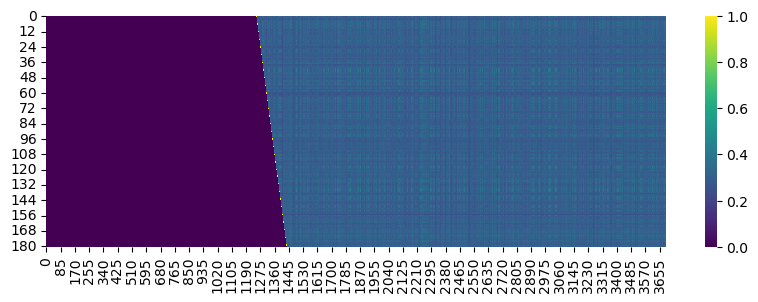

(197, 3696)


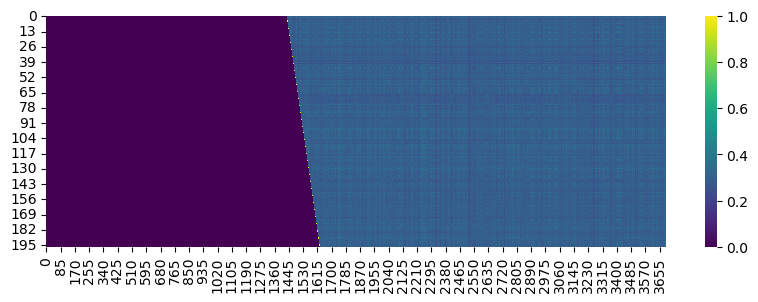

(218, 3696)


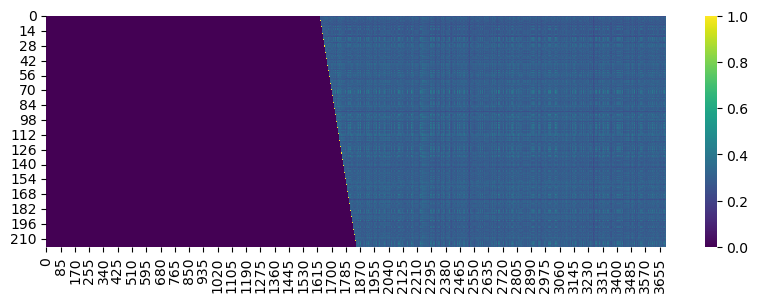

(248, 3696)


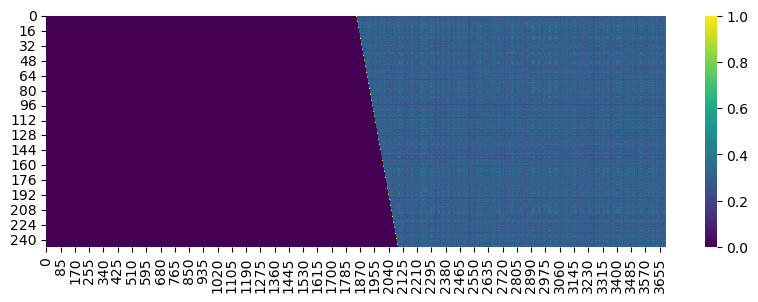

(294, 3696)


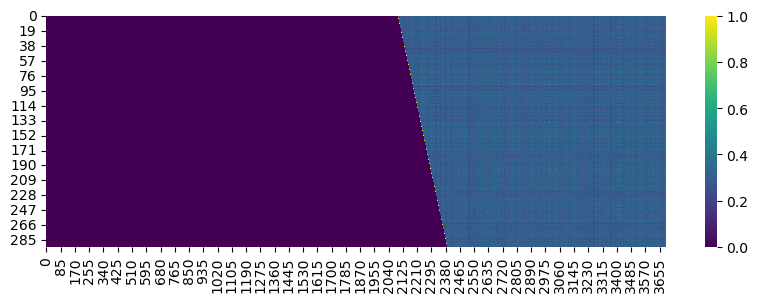

(382, 3696)


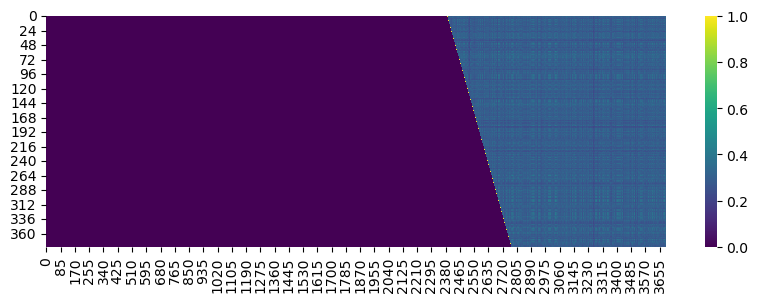

(924, 3696)


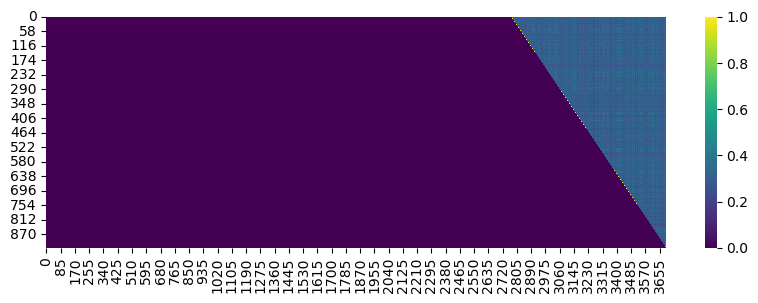

In [15]:
for mat in sparse_mat_list:
    print(mat.shape)
    dense = mat.todense()
    plt.figure(figsize=(10, 3))
    sns.heatmap(dense, cmap='viridis')
    plt.show()

In [16]:
from scipy.sparse import vstack

# Assuming sparse_mat_list is your list of sparse matrices
concatenated_matrix = vstack(sparse_mat_list)
concatenated_matrix.shape

(3696, 3696)

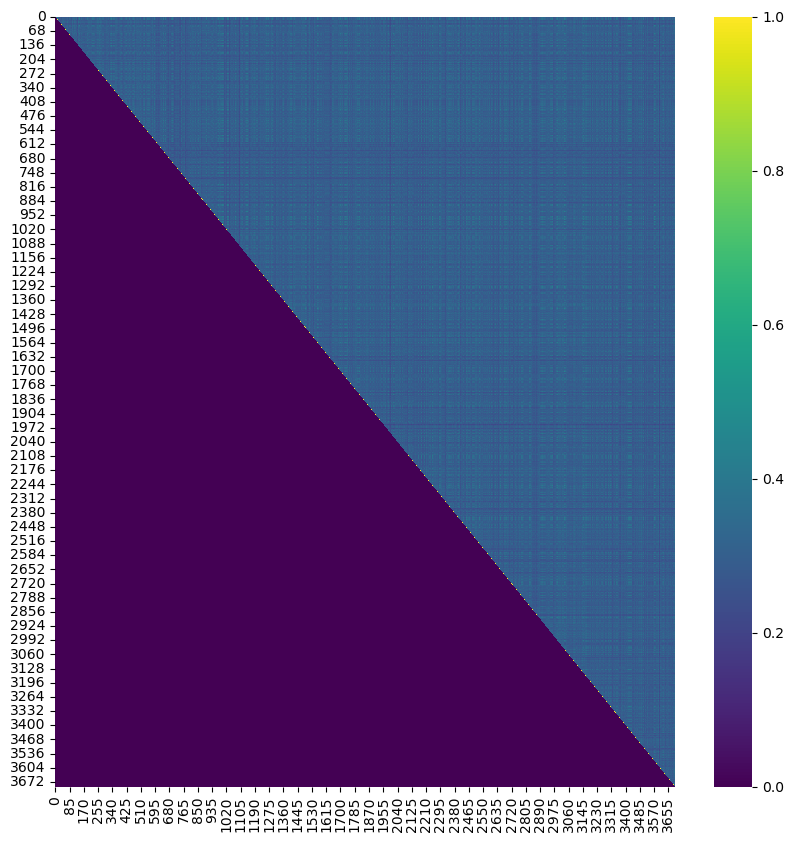

In [17]:
dense = concatenated_matrix.todense()
plt.figure(figsize=(10, 10))
sns.heatmap(dense, cmap='viridis')
plt.show()

In [20]:
concatenated_matrix.nnz

6832056

In [26]:
from scipy.sparse import save_npz
print(concatenated_matrix.shape)
save_npz('All_Pancreas_jaccard_matrix.npz', concatenated_matrix)

(3696, 3696)


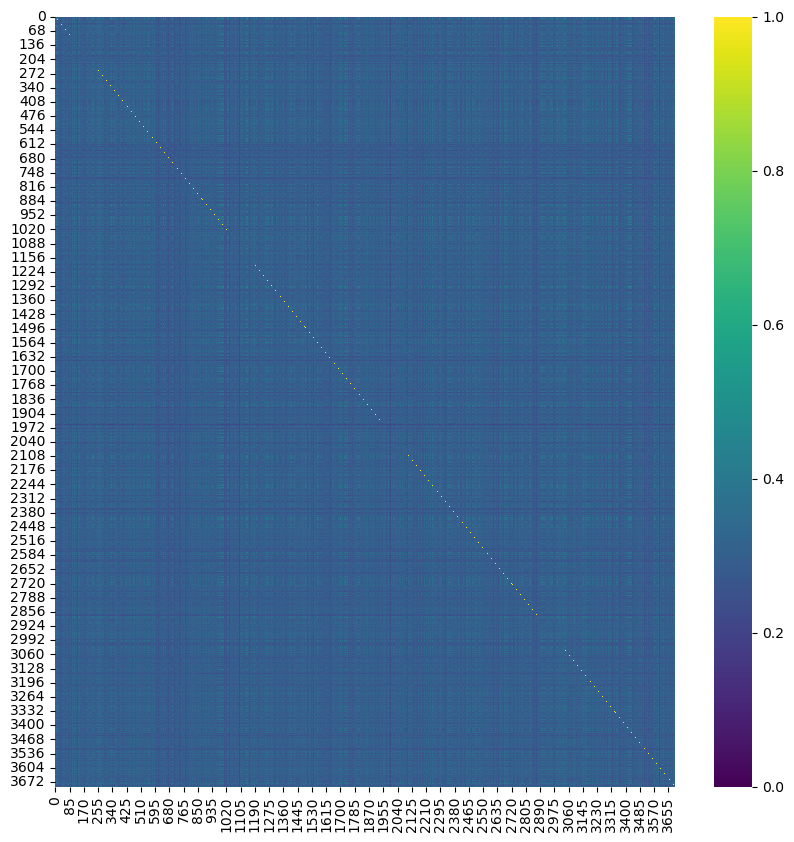

In [41]:
upper_right = np.triu(dense)
mirrored_jaccard_matrix = upper_right + upper_right.T - np.diag(upper_right.diagonal())
plt.figure(figsize=(10, 10))
sns.heatmap(mirrored_jaccard_matrix, cmap='viridis', vmin=0, vmax=1)
plt.show()

## UMAP with Jaccard matrix as neighboring graph

In [43]:
import scanpy as sc
import scvelo as scv

# read Pancreas data
adata = scv.datasets.pancreas('/Users/evanli/Documents/Research_datasets/endocrinogenesis_day15.h5ad')
print(adata.shape)

(3696, 27998)


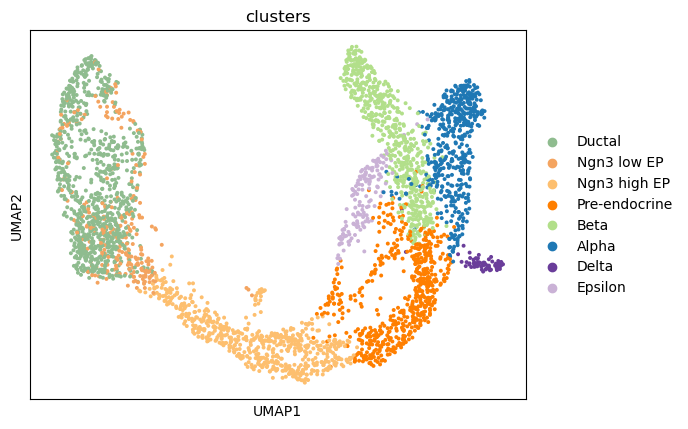

In [46]:
adata.obsp['distances'] = mirrored_jaccard_matrix
sc.pl.umap(adata, color='clusters')

## Sort Jaccard matrix with cell types

In [47]:
adata.obs.head()

clusters_coarse       clusters   S_score  G2M_score
index                                                               
AAACCTGAGAGGGATA   Pre-endocrine  Pre-endocrine -0.224902  -0.252071
AAACCTGAGCCTTGAT          Ductal         Ductal -0.014707  -0.232610
AAACCTGAGGCAATTA       Endocrine          Alpha -0.171255  -0.286834
AAACCTGCATCATCCC          Ductal         Ductal  0.599244   0.191243
AAACCTGGTAAGTGGC    Ngn3 high EP   Ngn3 high EP -0.179981  -0.126030

In [51]:
obs = adata.obs
obs = obs.reset_index(drop=True)
obs.drop(columns=['clusters_coarse', 'S_score', 'G2M_score'], inplace=True)
obs.head()

clusters
0  Pre-endocrine
1         Ductal
2          Alpha
3         Ductal
4   Ngn3 high EP

In [52]:
obs.shape

(3696, 1)

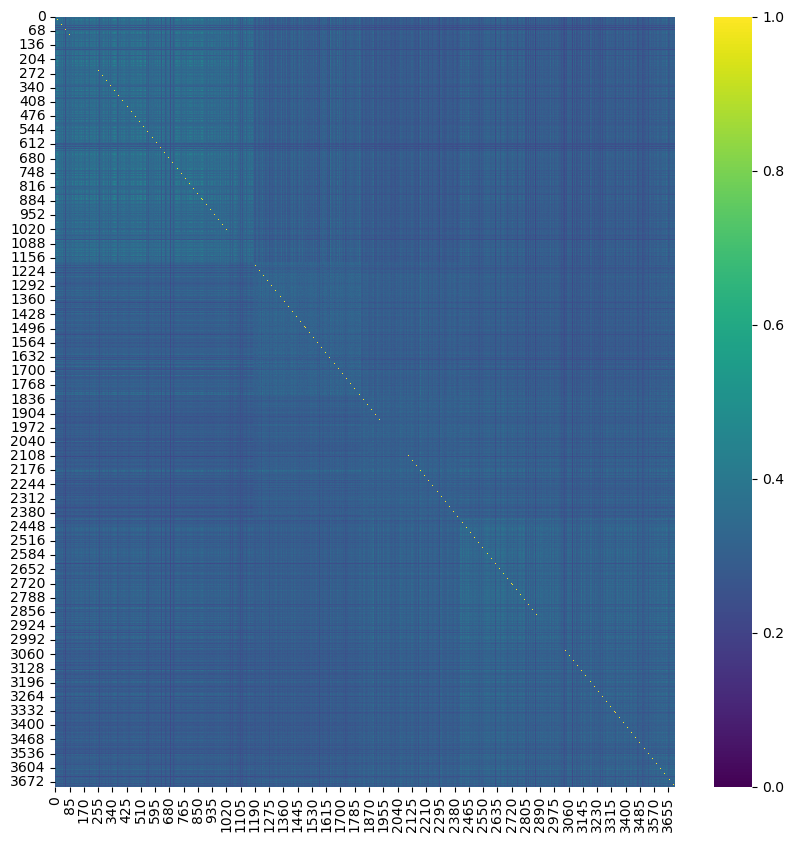

In [57]:
sorted_indices = obs.sort_values(by='clusters', ascending=True).index
sorted_jaccard_matrix = mirrored_jaccard_matrix[sorted_indices, :][:, sorted_indices]

plt.figure(figsize=(10, 10))
sns.heatmap(sorted_jaccard_matrix, cmap='viridis', vmin=0, vmax=1)
plt.show()

In [58]:
obs_sorted = obs.iloc[sorted_indices]
obs_sorted['clusters'].unique()

['Ductal', 'Ngn3 low EP', 'Ngn3 high EP', 'Pre-endocrine', 'Beta', 'Alpha', 'Delta', 'Epsilon']
Categories (8, object): ['Ductal', 'Ngn3 low EP', 'Ngn3 high EP', 'Pre-endocrine', 'Beta', 'Alpha', 'Delta', 'Epsilon']